# Algoritmi Genetici: Risoluzione del problema del commesso viaggiatore

Lo scopo di questa esercitazione è di studiare e applicare algoritmi genetici alla risoluzione del problema del commesso viaggiatore. Il problema può essere schematizzato come segue:
- Un certo numero di città sono distribuite, uniformemente o secondo uno schema, in un piano (nel nostro caso) 2-dimensionale
- Un viaggiatore (o venditore) deve visitare tutte le città una e una sola volta, ritornando infine al punto di partenza

Ci si pone come obiettivo di trovare la strada che sia più economica (e quindi più corta). Possiamo caratterizzare la strada scelta dal commesso con la permutazione che indica l'ordine in cui vengono visitate le città: imponiamo che la prima città sia sempre la stessa, così da ridurre la degenerazione dei percorsi ottimali a due (stesso percorso nei due versi di percorrenza). Utilizzando la terminologia e la schematizzazione di un problema di ottimizzazione, il problema si traduce nel trovare la permutazione che minimizza la funzione di costo 

$$
L^{(1)}(\vec{x_1},\dots,\vec{x_n}) = \sum_i |\vec{x_{i+1}}-\vec{x_i}|
$$
(che corrisponde alla lunghezza del percorso) o alternativamente di $L^{(2)}(\vec{x_1},\dots,\vec{x_n}) = \sum_i |\vec{x_{i+1}}-\vec{x_i}|^2 $.

Affrontiamo questo problema sviluppando un algoritmo genetico. Cerchiamo quindi di risolverlo traendo ispirazione dai meccanismi di selezione naturale: l'idea è di osservare lo sviluppo di una popolazione di "cromosomi" che presentino mutazioni genetiche spontanee con una certa probabilità $p_m$ e che si riproducano, mescolando il patrimonio genetico, con una certa probabilità $p_c$. In analogia al mondo naturale, i cromosomi migliori (quelli con costi dati da $L^{(1)}$ o $L^{(2)}$ minori) vengono scelti con una probabilità maggiore per la riproduzione di quelli con costi elevati.

## Implementazione

Per affrontare questo problema sono state sviluppate alcune classi e funzioni, contenute nella libreria "tsp.h".
Le possibili alternative nel tragitto sono state tradotte in vettori di interi, che rappresentano la sequenza degli indici delle città nell'ordine specifico di visita. Il primo elemento di ogni vettore è 0, e ogni indice deve apparire una e una sola volta. La funzione booleana <font face="Courier">TSPCheckPerm(vector<int>)</font> controlla se la permutazione è ammissibile.
Le classi sviluppate sono:
- **Classe <font face="Courier">TSP</font>**: rappresenta un generico problema del commmesso viaggiatore. È caratterizzata da un vettore di punti 2-dimensionali (le posizioni delle città), da funzioni membro per generare diverse distribuzioni di città (uniforme o su di una circonferenza) e da una funzione membro che calcola il costo di una data permutazione (nella forma di  $L^{(2)}$).
- **Classe <font face="Courier">TSPSorter</font>**: è un funtore per applicare gli algoritmi della libreria standard (std::sort()) alla popolazione e ordinarla in funzione del costo di una permutazione.
<font face="Courier"></font>
- **Classe <font face="Courier">GeneticTSP</font>**: è un oggetto per applicare un algoritmo genetico a un oggetto <font face="Courier">TSP</font> (da cui eredita). Il principale data member è un vettore di vettori di interi che rappresenta la popolazione. Sono presenti tre metodi per mutare i cromosomi (vettori di interi), un operatore di crossover che combina due cromosomi genitori in due cromosomi figli e un operatore di selezione che restituisce un cromosoma scelto tra la popolazione con probabilità maggiore tanto quanto è minore il suo costo. Tutte queste operazioni sono utilizzate estensivamente in due membri con cui si gestisce la simulazione: la prima è il costruttore, che in base agli argomenti crea un problema con un certo numero di città distribuite in una certa configurazione e una popolazione di una certa taglia. La seconda è un membro <font face="Courier">MakeGeneration</font> che sviluppa una nuova generazione a partire da quella vecchia, con probabilità di mutazione e crossover passate come argomenti. La presenza di un'istanza della classe <font face="Courier">TSPSorter</font> come membro di <font face="Courier">GeneticTSP</font> permette al costruttore e a <font face="Courier">MakeGeneration</font> di ordinare la popolazione per costo crescente alla fine di ogni esecuzione: questo accorgimento rende più solido ed efficiente il codice, dato che l'operatore di selezione sceglie i cromosomi in funzione della loro posizione nella popolazione (che si presume ordinata).

#### Funzionamento dell'operatore di selezione
La probabilità di selezione è data da $p(cost) = \big(\frac{cost-cost_{max}}{cost_{min}-cost_{max}}\big)^p $, con $p=2$. Si può variare l'esponente per ottenere un operatore di selezione più o meno rigoroso.

Per avere un'idea di come e quanto vengono selezionati i vari elementi della popolazione, in questo grafico sono rappresentati alcuni elementi appartenenti alla popolazione iniziale di una simulazione. In ascissa è rappresentato il costo della permutazione e in ordinata la corrispondente probabilità di essere selezionata.

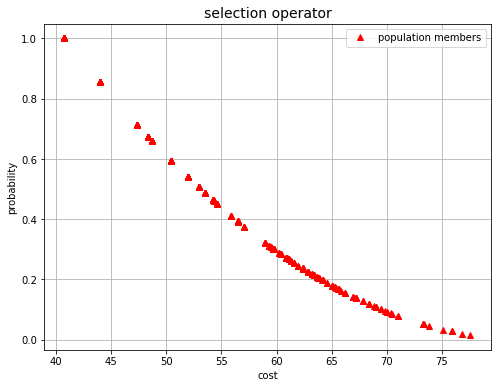

In [1]:
#view how the selection operator works

import matplotlib.pyplot as plt
import numpy as np

cost, p = np.loadtxt('output/selection_operator/selection.dat',unpack=True)

plt.figure(figsize=(8,6))
plt.plot(cost,p,'r^',label='population members')
plt.grid(True)
plt.xlabel('cost')
plt.ylabel('probability')
plt.title('selection operator',fontsize=14)

plt.legend()
plt.show()

## Problema del commesso viaggiatore: 32 città distribuite su di una circonferenza

In questa sezione si analizzano i risultati dell'applicazione delle tecniche sopra discusse a un problema in cui 32 città sono distribuite casualmente su di una circonferenza. In questa particolare conformazione si può intuire che la soluzione migliore è quella di visitare le città in ordine, percorrendo mano a mano l'intera circonferenza. Avere un'idea della soluzione del problema è in questo caso molto utile per confrontarsi con i risultati ottenuti con l'algoritmo e capirne l'efficienza e le potenzialità.

Riportiamo i parametri utilizzati in questa simulazione

- $p_c=0.7$ 
- $p_{m1}=0.11$
- $p_{m2}=0.11$
- $p_{m3}=0.09$
- elementi della popolazione = $1000$

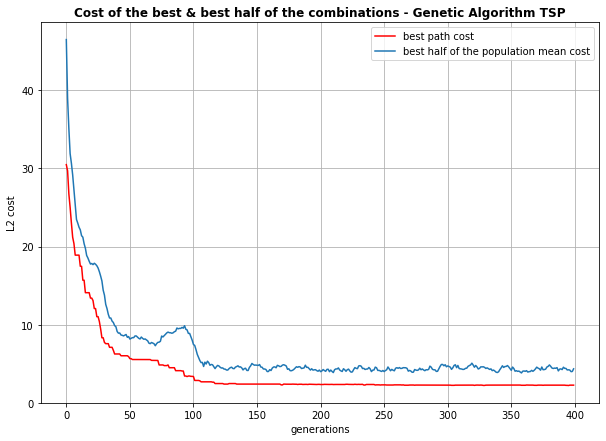

final cost :  2.25759


In [2]:
#see how the lowest cost goes

import matplotlib.pyplot as plt
import numpy as np

best = np.loadtxt('output/circle/lowest.dat')
x = np.arange(best.size)
besthalf = np.loadtxt('output/circle/lowerhalf.dat',unpack=True)

plt.figure(figsize=(10,7))
plt.plot(x,best,'r',label='best path cost')
plt.plot(x,besthalf,label='best half of the population mean cost')
plt.grid(True)
plt.xlabel('generations')
plt.ylabel('L2 cost')
plt.title("Cost of the best & best half of the combinations - Genetic Algorithm TSP",fontweight='bold')
plt.legend()
plt.show()

print('final cost : ',best[best.size-1])

In questo grafico sono rappresentati il costo della permutazione migliore e la media dei costi della metà migliore di popolazione.

### Visualizzazione del percorso migliore

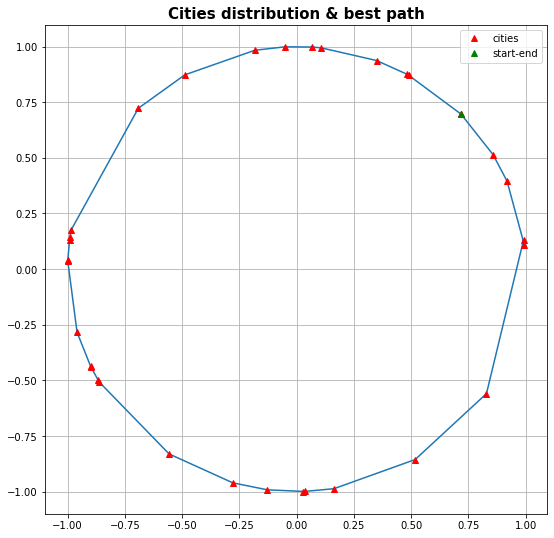

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x,y = np.loadtxt("output/circle/bestpath.dat", unpack=True)
x = np.append(x, x[0])
y = np.append(y, y[0])

plt.figure(figsize=(9,9))
plt.plot(x,y)
plt.plot(x,y,'r^',label='cities')
plt.plot(x[0],y[0],'g^',label='start-end')
plt.grid(True)
plt.title('Cities distribution & best path',fontweight='bold',fontsize=15)

plt.legend()
plt.show()


La permutazione ottenuta corrisponde al percorso migliore.

## Problema del commesso viaggiatore: 32 città distribuite in un quadrato

In questa sezione si tratta invece del problema nella sua versione più generica: le 32 città sono distribuite in maniera casuale all'interno di un quadrato. In questo caso, ovviamente, la soluzione esatta non è nota. Possiamo osservare però quanto l'algoritmo migliori dalle configurazioni casuali di partenza, e sperare che il risultato finale sia ragionevolmente vicino al minimo assoluto della funzione di costo.

Riportiamo i parametri utilizzati in questa simulazione:
- $p_{m1}=0.09$
- $p_{m2}=0.1$
- $p_{m3}=0.1$
- $p_c=0.7$
- elementi della popolazione $=1000$

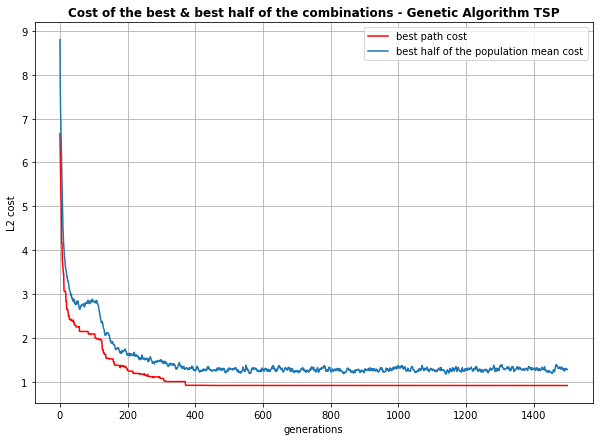

final cost :  0.91458


In [4]:
#see how the lowest cost goes

import matplotlib.pyplot as plt
import numpy as np

best = np.loadtxt('output/square/lowest.dat')
x = np.arange(best.size)
besthalf = np.loadtxt('output/square/lowerhalf.dat',unpack=True)

plt.figure(figsize=(10,7))
plt.plot(x,best,'r',label='best path cost')
plt.plot(x,besthalf,label='best half of the population mean cost')
plt.grid(True)
plt.xlabel('generations')
plt.ylabel('L2 cost')
plt.title("Cost of the best & best half of the combinations - Genetic Algorithm TSP",fontweight='bold')
plt.legend()
plt.show()

print('final cost : ',best[best.size-1])

### Visualizzazione del percorso migliore

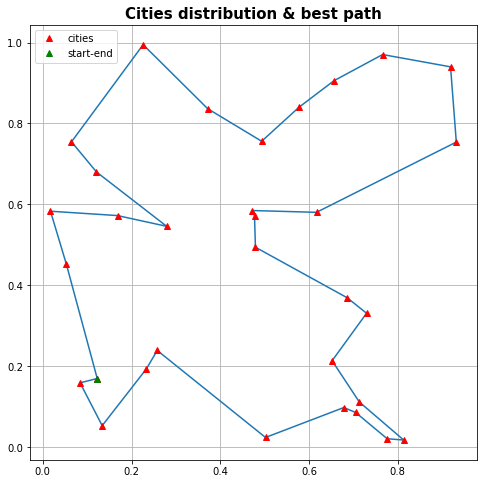

In [5]:
import matplotlib.pyplot as plt
import numpy

x,y = np.loadtxt("output/square/bestpath.dat", unpack=True)
x = np.append(x, x[0])
y = np.append(y, y[0])

plt.figure(figsize=(8,8))
plt.plot(x,y)
plt.plot(x,y,'r^',label='cities')
plt.plot(x[0],y[0],'g^',label='start-end')
plt.grid(True)
plt.title('Cities distribution & best path',fontweight='bold',fontsize=15)

plt.legend()
plt.show()



La simulazione è stabile già intorno alla 500° generazione. Nella popolazione è presente una permutazione con costo $0.915$, appena al di sopra del migliore stato trovato (il cui costo è $0.914$). L'operatore di selezione non riesce a fare prevalere il secondo sul primo, quindi solo saltuariamente la miglior permutazione è presente nella popolazione. Questo accade dopo $1500$ generazioni e saltuariamente nelle generazioni precedenti.